# Data Bootcamp Assignment #4

## ADA8211, MBS9246, HTF218, JF4190
### Archish Arun, Mitchell Svetov, Harrison Fries, Joshua Finkelstein

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from numpy import random

from plotnine import *
%matplotlib inline

# Question 1

In [124]:
# Initialize DataFrame
df = pd.read_csv("rdd_rarotonga.csv")
df

,yield,score
0,143.458137,765.963832
1,210.550664,767.953965
2,141.786601,764.862454
3,192.392737,765.292672
4,182.075053,764.681314
...,...,...
995,195.153043,767.412813
996,150.221497,764.927544
997,196.221953,766.773213
998,220.852446,766.808223


In [125]:
# Create Gold-Tipped Status Column

for col in df:
    score = df["score"] > 766.0
    df["status"] = score

df["status"] = df["status"].astype(int)

df["output"] = df["yield"]
df = df.drop("yield", axis=1)

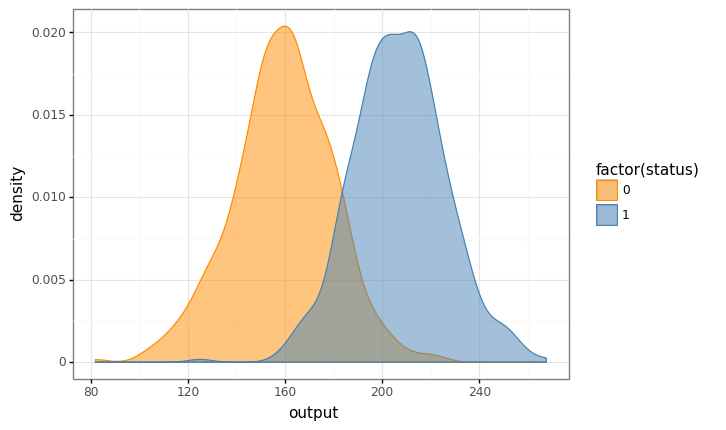

<ggplot: (8774985216525)>

In [126]:
(ggplot(data=df,mapping=aes(x='output', color='factor(status)',
                               fill='factor(status)'))+
geom_density(alpha=0.5)+
scale_color_manual(values=['darkorange','steelblue'])+ 
 scale_fill_manual(values=['darkorange','steelblue'])+ 
theme_bw())

Visually, based on the distribution curve, it seems like the golden tools do have an effect.

In [127]:
# Split into two dataframes

df_true = df[df["status"] == True]
df_false = df[df["status"] == False]



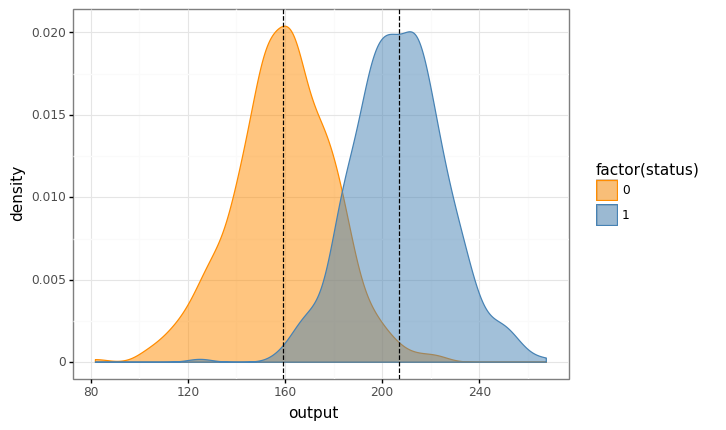

<ggplot: (8774725521104)>

In [128]:
(ggplot(data=df,mapping=aes(x='output', color='factor(status)',
                               fill='factor(status)'))+
geom_density(alpha=0.5)+
scale_color_manual(values=['darkorange','steelblue'])+ 
 scale_fill_manual(values=['darkorange','steelblue'])+ 
 geom_vline(xintercept=np.mean(df_true["output"]), linetype='dashed')+
  geom_vline(xintercept=np.mean(df_false["output"]), linetype='dashed')+

theme_bw())

In [129]:
# Average difference of fruit yielded from gold-tipped vs aluminium-tipped
ate = np.mean(df_true["output"])-np.mean(df_false["output"])
ate

47.798303506684164

In [130]:

reg1 = smf.ols('output ~ status',df).fit()

In [131]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     1446.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          2.55e-196
Time:                        00:08:45   Log-Likelihood:                -4406.9
No. Observations:                1000   AIC:                             8818.
Df Residuals:                     998   BIC:                             8828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    159.2781      0.876    181.774      0.000     157.559     160.998
status        47.7983      1.257     38.028      0.000      45.332      50.265
==============================================================================
Omnibus:                        7.512   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                9.658
Skew:                          -0.072   Prob(JB):                      0.00800
Kurtosis:                       3.459   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
reg1.params

Intercept    159.278140
status        47.798304
dtype: float64

In [133]:
reg1.conf_int()

,0,1
Intercept,157.558649,160.997632
status,45.331799,50.264808


### Test whether shape of data affects statistical significance

In [134]:
# square all score data and repeat OLS
df["output_squared"] = (df["output"])*(df["output"])
reg2 = smf.ols('output_squared ~ status',df).fit()

In [135]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         output_squared   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1448.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          1.63e-196
Time:                        00:08:45   Log-Likelihood:                -10307.
No. Observations:                1000   AIC:                         2.062e+04
Df Residuals:                     998   BIC:                         2.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04    319.789     80.645      0.000    2.52e+04    2.64e+04
status      1.746e+04    458.718     38.057      0.000    1.66e+04    1.84e+04
==============================================================================
Omnibus:                       28.091   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.315
Skew:                           0.340   Prob(JB):                     5.83e-08
Kurtosis:                       3.580   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The t value indicates that the gold-tipped tools are a significant factor, based on the linear regression. This backs up the causal inference data.

### 1. How do we know if it's just the tools and not the level of ability measured by the test?
We know that the tools had an effect on output (yield) because of the size of the difference in means between the two tools. After running our regression on the difference in means we got a T-value of 38.03 which is extremely high and suggests that the difference between the two tools is statistically significant enough to not be attributed to the level of ability of people tested. This produced a p-value of effectively 0, suggesting that if there was no difference in the tools, results like this would nearly impossible to generate.  

### 2. What technique are you using and why?
We used both Causal Inference and Linear Regression to make these decisions. We used causal inference to determine whether the linear regression was representative of the relationship between tool types and a higher yield. The linear regression was used to find the T-value--whether or not the gold-tipped status was statistically significant or not in the relationship

### 3. How is this different from an experiment?
In an experiment, all the circumstantial variables are, to an extent, controlled, and observable. For this dataset, we could not assume that external variables were controlled and observable, and thus had to base our inferences on statistical significance for the only variable that was observable. In other words, the data we have doesn't account for whether external variables affect the "score" treatment result.

### 4. Can you check if the difference in tools actually creates different yields if you made different assumptions about the shape of the relationship you think yield and score have?
When running a regression with the squared output data, the T-value was effectively unchanged, at 38.05 (quadratic) vs 38.03 (linear). Additionally, the T-value is still extremely high, meaning that the tool type is statistically significant. We can thus assume that the shape of the relationship between yield and score doesn't affect the significance of the relationship itself.

# Question 2

After looking further in depth at the data-sets we proposed in the last assignment, we realized there were some issues with the F1 and MLB Pitch Data that could make researching them a hassle. We’ve decided to switch to the New Zealand Stolen Cars Dataset (https://www.kaggle.com/datasets/kkhandekar/stolen-vehicle-dataset). This dataset contains data on all stolen vehicles in New Zeleand over 6 months from roughly October 2021 - March 2022. 

We are aiming to answer questions about features and trends correspond with higher likelihoods of a car being stolen. We would examine by examining variables such as the location, time and date that cars were reported stolen to try and identify “risky” areas to leave your car in. We also would examine features of the vehicles that were stolen, examining their make, model, color, and year to find what cars are the “riskiest” to own from a theft perspective. We would likely start with simple organizing and cleaning, such as creating a descending list of car thefts by location and car brand to try and spot any clear trends. To test our hypotheses, we plan on using regression with dummy variables to try and find differences in theft rates across different variables, as was done in Notebook 17 on Randomized Controlled Trials and Casual Inference. We also plan on using K-nearest neighbors to try and predict where a car will be stolen from based on certain parameters. One limitation of this dataset is that its lacking context that would be highly important in helping us understand trends. For example, how would we know if Toyota’s are the most commonly stolen make of vehicle because they’re easy to steal, rather than them just being the most common car in New Zealand? The same is true of locations; how would we know Canterbury is the most dangerous city to park a car in without knowing the proportion of New Zealand’s total population in Canterbury? In order to alleviate these limitations, we may end up bringing in data from outside this set to add context to our variables.